
# Multi Layer Perceptron


In [0]:
import numpy as np

In [0]:
# set seed for reproducibility
seed_val = 9000
np.random.seed(seed_val)

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [5]:
print('Size of the training_set: ', X_train.shape)
print('Size of the test_set: ', X_test.shape)
print('Shape of each image: ', X_train[0].shape)
print('Total number of classes: ', len(np.unique(y_train)))
print('Unique class labels: ', np.unique(y_train))

Size of the training_set:  (60000, 28, 28)
Size of the test_set:  (10000, 28, 28)
Shape of each image:  (28, 28)
Total number of classes:  10
Unique class labels:  [0 1 2 3 4 5 6 7 8 9]


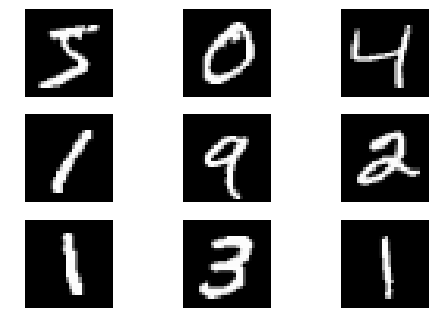

In [6]:
import matplotlib.pyplot as plt
# Plot of 9 random images
for i in range(0, 9):
    plt.subplot(331+i) # plot of 3 rows and 3 columns
    plt.axis('off') # turn off axis
    plt.imshow(X_train[i], cmap='gray') # gray scale

In [12]:
print('Maximum pixel value in the training_set: ', np.max(X_train))
print('Minimum pixel value in the training_set: ', np.min(X_train))

Maximum pixel value in the training_set:  255
Minimum pixel value in the training_set:  0


In [14]:
!pip install keras

In [0]:
# Number of epochs
epochs = 20

# Batchsize
batch_size = 128

# Optimizer for the generator
from keras.optimizers import Adam
optimizer = Adam(lr=0.0001)

# Shape of the input image
input_shape = (28,28,1)

In [0]:
from keras.models import Sequential
model = Sequential()

In [0]:
from keras.layers import Dense

In [0]:
model.add(Dense(300, input_shape=(784,), activation = 'relu'))

In [0]:
model.add(Dense(300,  activation='relu'))

In [0]:
model.add(Dense(10,  activation='softmax'))

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer , metrics = ['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.08333, random_state=42)

X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print('Training Examples', X_train.shape[0])
print('Validation Examples', X_val.shape[0])
print('Test Examples', X_test.shape[0])

Training Examples 55000
Validation Examples 5000
Test Examples 10000


In [24]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val)) 

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 3s 64us/step - loss: 7.1672 - acc: 0.5436 - val_loss: 5.5122 - val_acc: 0.6494
Epoch 2/20
55000/55000 [==============================] - 2s 45us/step - loss: 4.4734 - acc: 0.7121 - val_loss: 4.0397 - val_acc: 0.7408
Epoch 3/20
55000/55000 [==============================] - 2s 45us/step - loss: 3.8726 - acc: 0.7528 - val_loss: 3.9086 - val_acc: 0.7508
Epoch 4/20
55000/55000 [==============================] - 2s 44us/step - loss: 3.7606 - acc: 0.7606 - val_loss: 3.9568 - val_acc: 0.7488
Epoch 5/20
55000/55000 [==============================] - 2s 44us/step - loss: 3.6868 - acc: 0.7661 - val_loss: 3.7129 - val_acc: 0.7626
Epoch 6/20
55000/55000 [==============================] - 2s 44us/step - loss: 3.6235 - acc: 0.7706 - val_loss: 3.7490 - val_acc: 0.7612
Epoch 7/20
55000/55000 [==============================] - 2s 45us/step - loss: 3.5857 - acc: 0.7729 - val_loss: 3.6783 - val_acc:

In [25]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 1s 63us/step
Test loss: 0.5244417602744154
Accuracy: 0.9609


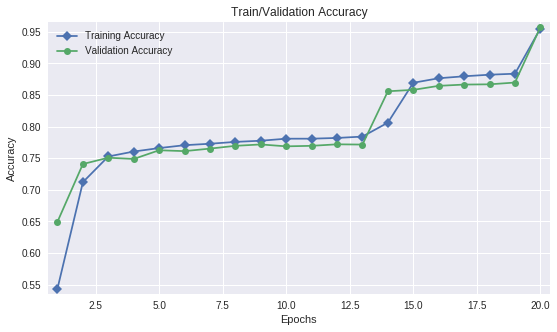

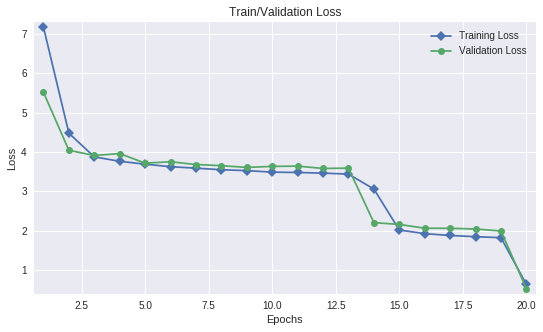

In [26]:
import matplotlib.pyplot as plt

def loss_plot(history):
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,len(train_acc)+1),train_acc,  marker = 'D', label = 'Training Accuracy')
    plt.plot(np.arange(1,len(train_acc)+1),val_acc,  marker = 'o', label = 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train/Validation Accuracy')
    plt.legend()
    plt.margins(0.02)
    plt.show()

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,len(train_acc)+1),train_loss, marker = 'D', label = 'Training Loss')
    plt.plot(np.arange(1,len(train_acc)+1),val_loss, marker = 'o', label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train/Validation Loss')
    plt.legend()
    plt.margins(0.02)
    plt.show()
    
loss_plot(history)

# Convolution


In [27]:
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
kernel = np.array([-1, 1, 0])

# empty feature map
conv_result = np.zeros(array.shape[0] - kernel.shape[0] +1).astype(int)

for i in range(array.shape[0] - kernel.shape[0] +1):
    # convolving
    conv_result[i] = (kernel * array[i:i+3]).sum()
    print(kernel, '*', array[i:i+3], '=', conv_result[i])
    
print('Feature Map :', conv_result)

[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
Feature Map : [ 1 -1  1 -1  1 -1  1 -1]


In [0]:
from keras.layers import Conv2D

In [29]:
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

print('Train data shape:', X_train.shape)
print('Val data shape:', X_val.shape)
print('Test data shape:', X_test.shape)

Train data shape: (55000, 28, 28, 1)
Val data shape: (5000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))

In [0]:
from keras.layers import Flatten
model.add(Flatten())

In [0]:
model.add(Dense(128, activation = 'relu'))

In [0]:
model.add(Dense(10, activation = 'softmax'))

In [35]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 6s 115us/step - loss: 8.4453 - acc: 0.4725 - val_loss: 6.0399 - val_acc: 0.6208
Epoch 2/20
55000/55000 [==============================] - 5s 98us/step - loss: 5.4658 - acc: 0.6578 - val_loss: 5.3724 - val_acc: 0.6616
Epoch 3/20
55000/55000 [==============================] - 5s 97us/step - loss: 5.2454 - acc: 0.6719 - val_loss: 5.2497 - val_acc: 0.6704
Epoch 4/20
55000/55000 [==============================] - 5s 97us/step - loss: 5.1453 - acc: 0.6781 - val_loss: 5.1577 - val_acc: 0.6776
Epoch 5/20
55000/55000 [==============================] - 5s 96us/step - loss: 5.0740 - acc: 0.6828 - val_loss: 5.1027 - val_acc: 0.6810
Epoch 6/20
55000/55000 [==============================] - 5s 98us/step - loss: 5.0082 - acc: 0.6871 - val_loss: 5.0538 - val_acc: 0.6826
Epoch 7/20
55000/55000 [==============================] - 5s 98us/step - loss: 4.9755 - acc: 0.6896 - val_loss: 5.0741 - val_acc

In [37]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 2s 167us/step
Test loss: 1.7270047664460713
Accuracy: 0.8844


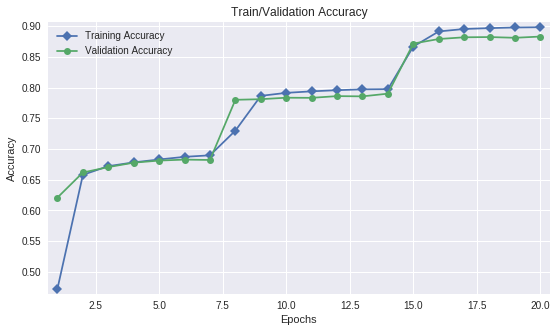

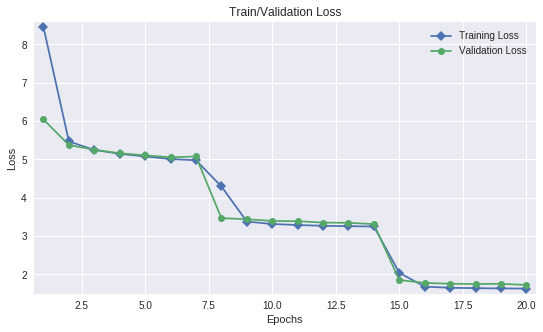

In [38]:
loss_plot(history)

# Pooling


In [40]:
import numpy as np
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
result = np.zeros(len(array)//2)
for i in range(len(array)//2):
    result[i] = np.max(array[2*i:2*i+2])
result

array([1., 1., 1., 1., 1.])

In [41]:
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
result = np.zeros(len(array)//2)
for i in range(len(array)//2):
    result[i] = np.mean(array[2*i:2*i+2])
result

array([0.5, 0.5, 0.5, 0.5, 0.5])

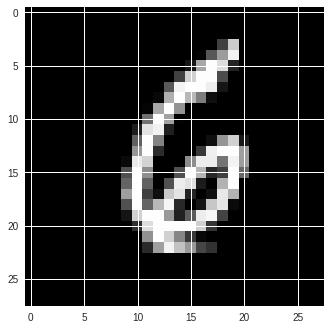

In [42]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')

In [0]:
def square_max_pool(image, pool_size=2):
    result = np.zeros((14,14))
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i,j] = np.max(image[i*pool_size : i*pool_size+pool_size, j*pool_size : j*pool_size+pool_size])
            
    return result

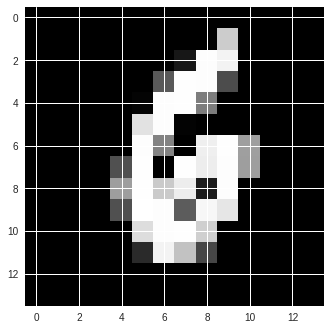

In [44]:
plt.imshow(square_max_pool(X_train[0].reshape(28,28)), cmap='gray')

In [0]:
from keras.layers import MaxPool2D

In [48]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 81us/step - loss: 4.2527 - acc: 0.7252 - val_loss: 3.6207 - val_acc: 0.7662
Epoch 2/20
55000/55000 [==============================] - 4s 74us/step - loss: 2.7122 - acc: 0.8228 - val_loss: 2.0632 - val_acc: 0.8620
Epoch 3/20
55000/55000 [==============================] - 4s 75us/step - loss: 1.8784 - acc: 0.8750 - val_loss: 1.8170 - val_acc: 0.8778
Epoch 4/20
55000/55000 [==============================] - 4s 75us/step - loss: 1.7310 - acc: 0.8846 - val_loss: 1.7118 - val_acc: 0.8864
Epoch 5/20
55000/55000 [==============================] - 4s 76us/step - loss: 1.6446 - acc: 0.8909 - val_loss: 1.6465 - val_acc: 0.8882
Epoch 6/20
55000/55000 [==============================] - 4s 75us/step - loss: 1.5861 - acc: 0.8943 - val_loss: 1.6268 - val_acc: 0.8882
Epoch 7/20
55000/55000 [==============================] - 4s 75us/step - loss: 1.5515 - acc: 0.8981 - val_loss: 1.6269 - val_acc:

In [50]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 1s 96us/step
Test loss: 1.5539939710008075
Accuracy: 0.8933


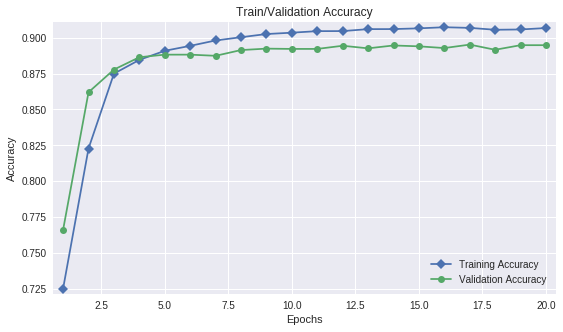

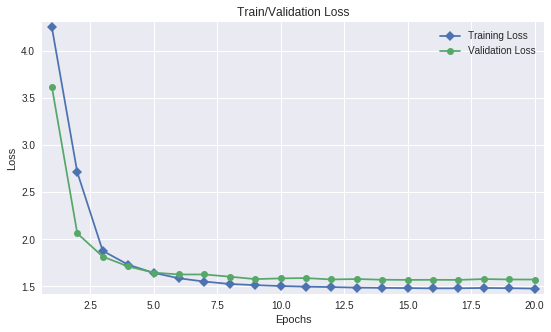

In [51]:
loss_plot(history)

# Dropout

In [0]:
from keras.layers import Dropout

In [53]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total para

In [54]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 90us/step - loss: 4.0026 - acc: 0.7301 - val_loss: 0.8546 - val_acc: 0.9174
Epoch 2/20
55000/55000 [==============================] - 5s 84us/step - loss: 0.6120 - acc: 0.9097 - val_loss: 0.2460 - val_acc: 0.9432
Epoch 3/20
55000/55000 [==============================] - 5s 83us/step - loss: 0.3025 - acc: 0.9259 - val_loss: 0.1773 - val_acc: 0.9528
Epoch 4/20
55000/55000 [==============================] - 5s 82us/step - loss: 0.2163 - acc: 0.9417 - val_loss: 0.1420 - val_acc: 0.9650
Epoch 5/20
55000/55000 [==============================] - 5s 82us/step - loss: 0.1668 - acc: 0.9548 - val_loss: 0.1175 - val_acc: 0.9690
Epoch 6/20
55000/55000 [==============================] - 5s 82us/step - loss: 0.1418 - acc: 0.9599 - val_loss: 0.0992 - val_acc: 0.9732
Epoch 7/20
55000/55000 [==============================] - 5s 82us/step - loss: 0.1171 - acc: 0.9658 - val_loss: 0.0877 - val_acc:

In [55]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 1s 96us/step
Test loss: 0.05984082971687239
Accuracy: 0.9843


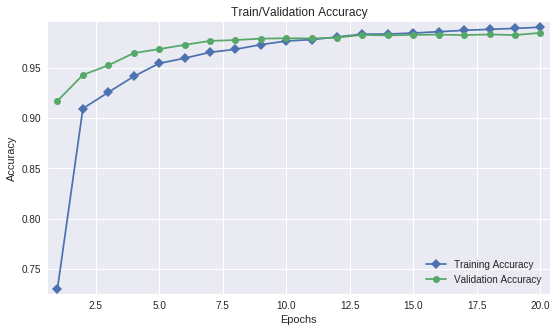

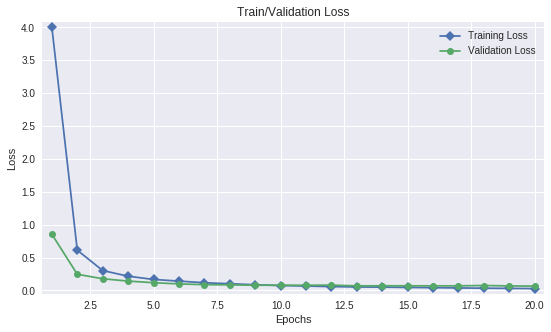

In [56]:
loss_plot(history)

# Deeper Convolution

In [57]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [58]:
history = model.fit(X_train, y_train, epochs = 20, batch_size=128, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 8s 140us/step - loss: 1.9736 - acc: 0.6047 - val_loss: 0.3445 - val_acc: 0.9056
Epoch 2/20
55000/55000 [==============================] - 7s 125us/step - loss: 0.5228 - acc: 0.8365 - val_loss: 0.2066 - val_acc: 0.9420
Epoch 3/20
55000/55000 [==============================] - 7s 125us/step - loss: 0.3724 - acc: 0.8879 - val_loss: 0.1623 - val_acc: 0.9540
Epoch 4/20
55000/55000 [==============================] - 7s 124us/step - loss: 0.3021 - acc: 0.9072 - val_loss: 0.1362 - val_acc: 0.9590
Epoch 5/20
55000/55000 [==============================] - 7s 123us/step - loss: 0.2515 - acc: 0.9247 - val_loss: 0.1205 - val_acc: 0.9626
Epoch 6/20
55000/55000 [==============================] - 7s 123us/step - loss: 0.2238 - acc: 0.9333 - val_loss: 0.1072 - val_acc: 0.9672
Epoch 7/20
55000/55000 [==============================] - 7s 123us/step - loss: 0.2024 - acc: 0.9393 - val_loss: 0.0993 - v

In [59]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 1s 107us/step
Test loss: 0.0439609499128419
Accuracy: 0.9864


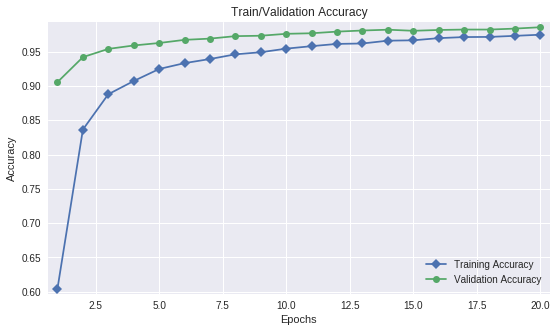

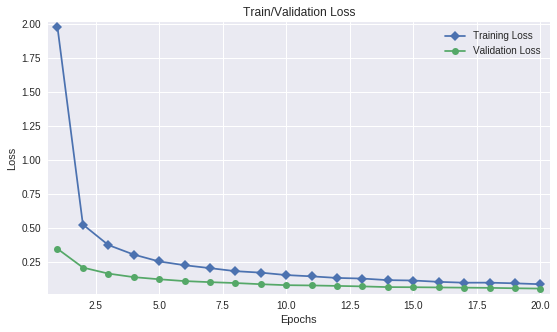

In [60]:
loss_plot(history)

In [61]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [62]:
history = model.fit(X_train, y_train, epochs = 40, batch_size=128, validation_data=(X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 8s 140us/step - loss: 1.8529 - acc: 0.6259 - val_loss: 0.3431 - val_acc: 0.8994
Epoch 2/40
55000/55000 [==============================] - 7s 128us/step - loss: 0.5133 - acc: 0.8410 - val_loss: 0.2216 - val_acc: 0.9322
Epoch 3/40
55000/55000 [==============================] - 7s 126us/step - loss: 0.3743 - acc: 0.8860 - val_loss: 0.1750 - val_acc: 0.9460
Epoch 4/40
55000/55000 [==============================] - 7s 125us/step - loss: 0.3031 - acc: 0.9092 - val_loss: 0.1463 - val_acc: 0.9544
Epoch 5/40
55000/55000 [==============================] - 7s 124us/step - loss: 0.2584 - acc: 0.9223 - val_loss: 0.1258 - val_acc: 0.9614
Epoch 6/40
55000/55000 [==============================] - 7s 125us/step - loss: 0.2299 - acc: 0.9305 - val_loss: 0.1113 - val_acc: 0.9660
Epoch 7/40
55000/55000 [==============================] - 7s 125us/step - loss: 0.2062 - acc: 0.9371 - val_loss: 0.1008 - v

In [63]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 1s 103us/step
Test loss: 0.03201477632472088
Accuracy: 0.9893


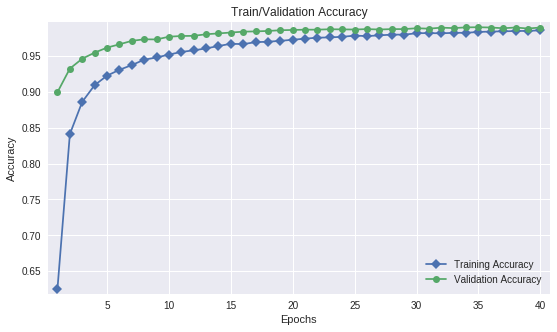

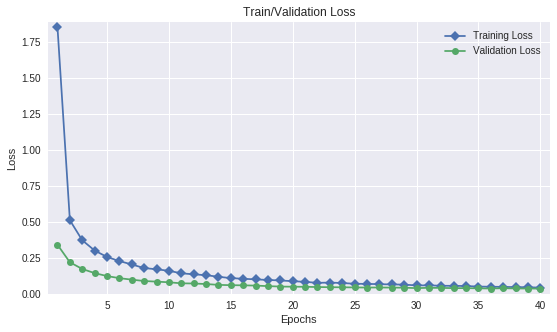

In [64]:
loss_plot(history)

In [0]:
##Data Augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(horizontal_flip=True)

In [0]:
# fit the augmentor
train_datagen.fit(X_train)

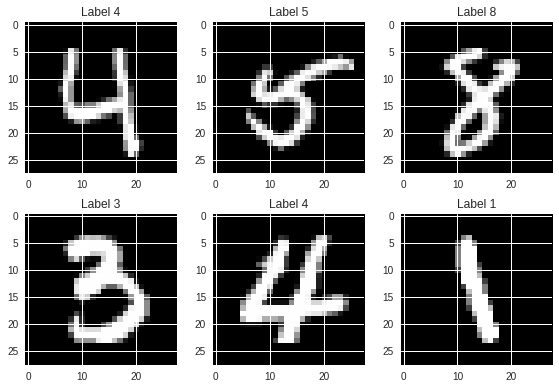

In [69]:
# transform the data
for img, label in train_datagen.flow(X_train, y_train, batch_size=6):
    for i in range(0, 6):
        plt.subplot(2,3,i+1)
        plt.title('Label {}'.format(label[i]))
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    break
plt.tight_layout()
plt.show()

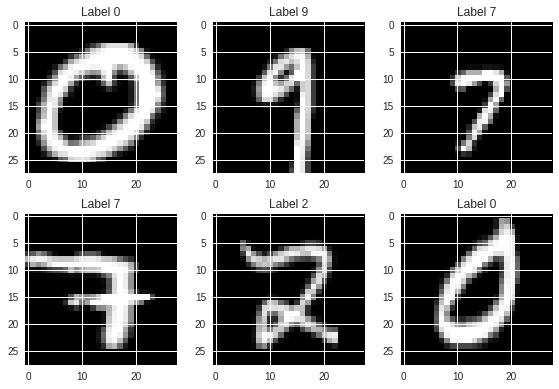

In [70]:
train_datagen = ImageDataGenerator(zoom_range=0.3)
#fit
train_datagen.fit(X_train)

#transform
for img, label in train_datagen.flow(X_train, y_train, batch_size=6):
    for i in range(0, 6):
        plt.subplot(2,3,i+1)
        plt.title('Label {}'.format(label[i]))
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    break
plt.tight_layout()
plt.show()

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True)

In [0]:
train_datagen.fit(X_train)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= Adam(lr=0.001), metrics = ['accuracy'])

In [79]:
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=128),
                    steps_per_epoch=len(X_train) / 128, epochs=10,
                    validation_data=(train_datagen.flow(X_val, y_val)))

Epoch 1/10
430/429 [==============================] - 18s 43ms/step - loss: 0.7970 - acc: 0.7317 - val_loss: 0.3087 - val_acc: 0.9038
Epoch 2/10
430/429 [==============================] - 17s 41ms/step - loss: 0.3466 - acc: 0.8902 - val_loss: 0.1981 - val_acc: 0.9412
Epoch 3/10
430/429 [==============================] - 18s 41ms/step - loss: 0.2568 - acc: 0.9203 - val_loss: 0.1654 - val_acc: 0.9486
Epoch 4/10
430/429 [==============================] - 18s 41ms/step - loss: 0.2198 - acc: 0.9313 - val_loss: 0.1332 - val_acc: 0.9600
Epoch 5/10
430/429 [==============================] - 17s 40ms/step - loss: 0.1857 - acc: 0.9418 - val_loss: 0.1192 - val_acc: 0.9632
Epoch 6/10
430/429 [==============================] - 17s 41ms/step - loss: 0.1711 - acc: 0.9469 - val_loss: 0.1026 - val_acc: 0.9690
Epoch 7/10
430/429 [==============================] - 17s 41ms/step - loss: 0.1561 - acc: 0.9517 - val_loss: 0.0977 - val_acc: 0.9712
Epoch 8/10
430/429 [==============================] - 18s 41ms

In [80]:
for test_img, test_lab in train_datagen.flow(X_test, y_test, batch_size = X_test.shape[0]):
    break

loss,acc = model.evaluate(test_img, test_lab)
print('Test loss:', loss)
print('Accuracy:', acc)

10000/10000 [==============================] - 1s 107us/step
Test loss: 0.07422855299189687
Accuracy: 0.9764


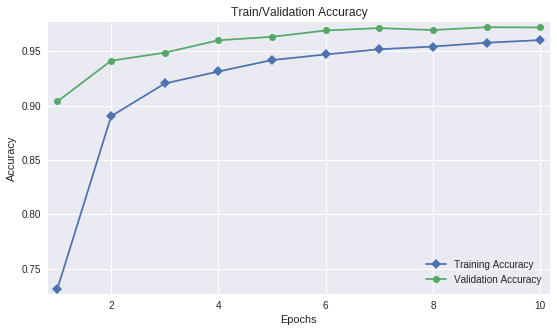

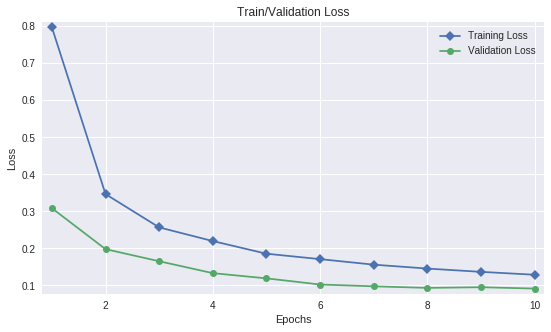

In [81]:
loss_plot(history)

# Autoencoder


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras import backend as k

# for resizing images
from scipy.misc import imresize

In [18]:

def reshape(x):
    """Reshape images to 14*14"""
    img = imresize(x.reshape(28,28), (14, 14))
    return img

# create 14*14 low resolution train and test images
XX_train = np.array([*map(reshape, X_train.astype(float))])
XX_test = np.array([*map(reshape, X_test.astype(float))])

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [0]:
# scale images to range between 0 and 1
#14*14 train images
XX_train = XX_train/255
#28*28 train label images
X_train = X_train/255

#14*14 test images
XX_test = XX_test/255
#28*28 test label images
X_test = X_test/255

In [24]:
batch_size = 128
epochs = 40
input_shape = (14,14,1)

def make_autoencoder(input_shape):
    
    generator = Sequential()
    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    generator.add(MaxPooling2D(pool_size=(2, 2)))
    
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    
    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    
    generator.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    return generator


autoencoder = make_autoencoder(input_shape)
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(lr=0.0002, beta_1=0.5))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 14, 14, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 128)         147584    
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 28, 28, 64)        0         
__________

In [25]:
autoencoder_train = autoencoder.fit(XX_train.reshape(-1,14,14,1), X_train.reshape(-1,28,28,1), batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_split = 0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 11s 236us/step - loss: 0.0282 - val_loss: 0.0127
Epoch 2/40
48000/48000 [==============================] - 11s 225us/step - loss: 0.0082 - val_loss: 0.0068
Epoch 3/40
48000/48000 [==============================] - 11s 226us/step - loss: 0.0060 - val_loss: 0.0054
Epoch 4/40
48000/48000 [==============================] - 11s 225us/step - loss: 0.0050 - val_loss: 0.0048
Epoch 5/40
48000/48000 [==============================] - 11s 227us/step - loss: 0.0044 - val_loss: 0.0044
Epoch 6/40
48000/48000 [==============================] - 11s 223us/step - loss: 0.0040 - val_loss: 0.0040
Epoch 7/40
48000/48000 [==============================] - 11s 221us/step - loss: 0.0037 - val_loss: 0.0036
Epoch 8/40
48000/48000 [==============================] - 11s 222us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 9/40
48000/48000 [==============================] - 11s 221us/step - loss: 0.0033 - val_

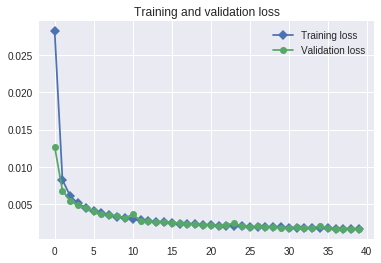

Input


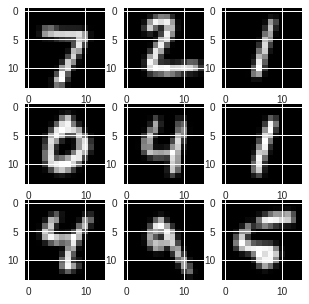

GENERATED


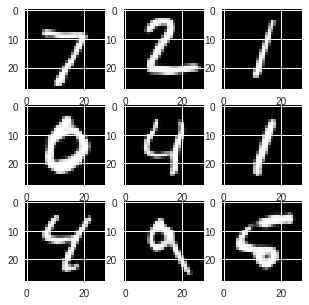

In [26]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs_ = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs_, loss, label='Training loss', marker = 'D')
plt.plot(epochs_, val_loss, label='Validation loss', marker = 'o')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print('Input')
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(np.squeeze(XX_test.reshape(-1,14,14)[i]), cmap='gray')
plt.show()

# Test set results
print('GENERATED')
plt.figure(figsize=(5,5))
for i in range(9):
    pred = autoencoder.predict(XX_test.reshape(-1,14,14,1)[i:i+1], verbose=0)
    plt.subplot(331 + i)
    plt.imshow(pred[0].reshape(28,28), cmap='gray')
plt.show()